In [1]:
import pandas as pd
import os

In [2]:
df1 = pd.read_csv ("climate_mood_data.csv")
df2 = pd.read_csv ("climate_mood_data_Barcelona.csv")

print(df1.columns)
print(df2.columns)

Index(['url', 'paragraph', 'cities', 'total_key_terms', 'climate',
       'mental_health', 'population', 'methodology', 'sentiment_score'],
      dtype='object')
Index(['url', 'paragraph', 'cities', 'total_key_terms', 'climate',
       'mental_health', 'population', 'methodology', 'sentiment_score'],
      dtype='object')


In [3]:
# Combine both DataFrames
df = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.head()

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,sentiment_score
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,['Stockholm'],14,2,11,1,0,-0.021759
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,-0.022222
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,-0.050000
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000


In [6]:
# Remove brackets and quotes from city names (e.g., from "['Barcelona']" to "Barcelona")
df['cities'] = df['cities'].astype(str).str.extract(r"\['(.+?)'\]")

In [7]:
df

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,sentiment_score
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,-0.021759
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,-0.022222
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,-0.050000
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000
...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,0,0.000000
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,1,0,0.000000
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,0,1,0.000000
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,0,0.108333


In [11]:
df[df['url'].str.contains('neurology.org/doi/10.1212/WNL.0000000000207656', na=False)]

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,sentiment_score


In [10]:
# Mask for rows that could be Stockholm
stockholm_extra_urls = [
    "https://www.neurology.org/doi/10.1212/WNL.0000000000207656"
]

mask_stockholm = (
    (df['cities'].isnull() | (df['cities'] == '')) & (
        df['url'].str.contains('stockholm|scandinavian|swedish|sweden|ndvi', case=False, na=False) |
        df['paragraph'].str.contains('stockholm|scandinavian|swedish|sweden|ndvi', case=False, na=False) |
        df['url'].isin(stockholm_extra_urls)
    )
)

print(f"Rows candidate to assign 'Stockholm': {mask_stockholm.sum()}")

# Mask for rows that could be Barcelona
mask_barcelona = (
    df['cities'].isnull() | (df['cities'] == '')  # rows without city assigned
) & (
    df['url'].str.contains('barcelona', case=False, na=False) |
    df['paragraph'].str.contains('barcelona', case=False, na=False)
)

print(f"Rows candidate to assign 'Barcelona': {mask_barcelona.sum()}")

# Show some example rows for review before assignment
print("\nExample rows for Stockholm:")
print(df.loc[mask_stockholm, ['url', 'paragraph', 'cities']].head(5))

print("\nExample rows for Barcelona:")
print(df.loc[mask_barcelona, ['url', 'paragraph', 'cities']].head(5))


Rows candidate to assign 'Stockholm': 3
Rows candidate to assign 'Barcelona': 36

Example rows for Stockholm:
                                                  url  \
3           https://pubmed.ncbi.nlm.nih.gov/33806787/   
5           https://pubmed.ncbi.nlm.nih.gov/33806787/   
99  https://e-noticies.cat/en/weather/happiness-ar...   

                                            paragraph cities  
3   Mental health estimates associated with NDVI w...    NaN  
5   Mental health estimates associated with NDVI w...    NaN  
99  "The Scandinavian high pressures, with a very ...    NaN  

Example rows for Barcelona:
                                                  url  \
7   https://www.isglobal.org/en/-/el-rendimiento-c...   
8   https://www.isglobal.org/en/-/el-rendimiento-c...   
11  https://www.isglobal.org/en/-/el-rendimiento-c...   
14  https://www.isglobal.org/en/-/el-rendimiento-c...   
15  https://www.isglobal.org/en/-/el-rendimiento-c...   

                                     

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              143 non-null    object 
 1   paragraph        143 non-null    object 
 2   cities           28 non-null     object 
 3   total_key_terms  143 non-null    int64  
 4   climate          143 non-null    int64  
 5   mental_health    143 non-null    int64  
 6   population       143 non-null    int64  
 7   methodology      143 non-null    int64  
 8   sentiment_score  143 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 10.2+ KB


In [13]:
df.isnull().sum()

url                  0
paragraph            0
cities             115
total_key_terms      0
climate              0
mental_health        0
population           0
methodology          0
sentiment_score      0
dtype: int64

In [14]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,143,14,https://www.isglobal.org/en/-/el-rendimiento-c...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paragraph,143,125,"If you do not provide this required data, we w...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cities,28,2,Barcelona,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_key_terms,143.0,NaN,NaN,NaN,3.160839,3.791485,1.0,1.0,2.0,3.0,26.0
climate,143.0,NaN,NaN,NaN,1.314685,2.19609,0.0,0.0,0.0,2.0,11.0
mental_health,143.0,NaN,NaN,NaN,1.055944,1.860547,0.0,0.0,0.0,1.0,14.0
population,143.0,NaN,NaN,NaN,0.713287,1.710046,0.0,0.0,0.0,1.0,15.0
methodology,143.0,NaN,NaN,NaN,0.076923,0.267406,0.0,0.0,0.0,0.0,1.0
sentiment_score,143.0,NaN,NaN,NaN,0.055845,0.168414,-0.45,-0.007937,0.05,0.131061,0.5


In [15]:
# Normalize thematic mentions by the total number of key terms
df['climate_norm'] = df['climate'] / df['total_key_terms']
df['mental_health_norm'] = df['mental_health'] / df['total_key_terms']
df['population_norm'] = df['population'] / df['total_key_terms']

In [16]:
# Binary flag: 1 if the topic is mentioned at least once
df['climate_mentioned'] = df['climate'] > 0
df['mental_health_mentioned'] = df['mental_health'] > 0
df['population_mentioned'] = df['population'] > 0

In [17]:
df

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,sentiment_score,climate_norm,mental_health_norm,population_norm,climate_mentioned,mental_health_mentioned,population_mentioned
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,-0.021759,0.142857,0.785714,0.071429,True,True,True
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,-0.022222,0.000000,0.666667,0.333333,False,True,True
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000,0.000000,1.000000,0.000000,False,True,False
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,-0.050000,0.500000,0.500000,0.000000,True,True,False
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000,0.000000,1.000000,0.000000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,0,0.000000,0.000000,1.000000,0.000000,False,True,False
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,1,0,0.000000,0.000000,0.000000,1.000000,False,False,True
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,0,1,0.000000,0.333333,0.333333,0.000000,True,True,False
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,0,0.108333,0.500000,0.500000,0.000000,True,True,False


In [18]:
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: "positive" if x > 0 else "negative")


In [19]:
df

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,sentiment_score,climate_norm,mental_health_norm,population_norm,climate_mentioned,mental_health_mentioned,population_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,-0.021759,0.142857,0.785714,0.071429,True,True,True,negative
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,-0.022222,0.000000,0.666667,0.333333,False,True,True,negative
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000,0.000000,1.000000,0.000000,False,True,False,negative
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,-0.050000,0.500000,0.500000,0.000000,True,True,False,negative
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,-0.100000,0.000000,1.000000,0.000000,False,True,False,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,0,0.000000,0.000000,1.000000,0.000000,False,True,False,negative
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,1,0,0.000000,0.000000,0.000000,1.000000,False,False,True,negative
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,0,1,0.000000,0.333333,0.333333,0.000000,True,True,False,negative
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,0,0.108333,0.500000,0.500000,0.000000,True,True,False,positive


In [20]:
df.drop(columns=['sentiment_score', 'climate_norm', 'mental_health_norm', 'population_norm'], inplace=True)


In [21]:
df

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,climate_mentioned,mental_health_mentioned,population_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,True,True,True,negative
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,False,True,True,negative
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,False,True,False,negative
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,True,True,False,negative
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,False,True,False,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,0,False,True,False,negative
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,1,0,False,False,True,negative
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,0,1,True,True,False,negative
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,0,True,True,False,positive


In [22]:
filtered_df = df[df['cities'].isin(['Barcelona', 'Stockholm'])]
filtered_df

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,climate_mentioned,mental_health_mentioned,population_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,True,True,True,negative
6,https://www.isglobal.org/en/-/el-rendimiento-c...,Cognitive performance and stress worsen on hig...,Barcelona,5,2,3,0,0,True,True,False,negative
9,https://www.isglobal.org/en/-/el-rendimiento-c...,To compare the sample and establish correlatio...,Barcelona,3,1,0,1,1,True,False,True,negative
10,https://www.isglobal.org/en/-/el-rendimiento-c...,The public’s interest in the effects of pollut...,Barcelona,3,1,2,0,0,True,True,False,positive
12,https://www.isglobal.org/en/-/el-rendimiento-c...,The citizen recommendations will be presented ...,Barcelona,3,1,1,0,1,True,True,False,positive
13,https://www.isglobal.org/en/-/el-rendimiento-c...,You will not find any advertising or personali...,Barcelona,12,0,3,9,0,False,True,True,positive
68,https://eurocities.eu/stories/barcelona-finds-...,Time: one of the most treasured yet scarcer co...,Barcelona,17,0,1,15,1,False,True,True,positive
70,https://eurocities.eu/stories/barcelona-finds-...,"Yet, the Barcelona municipality is convinced t...",Barcelona,1,0,0,1,0,False,False,True,positive
71,https://eurocities.eu/stories/barcelona-finds-...,“Barcelona was one of the first European citie...,Barcelona,2,0,0,2,0,False,False,True,positive
72,https://eurocities.eu/stories/barcelona-finds-...,Reading books to children or helping them with...,Barcelona,2,0,0,2,0,False,False,True,negative


In [23]:
# Create a copy without the 'population' column
df_no_population = df.drop(columns=["population"])

In [24]:
df_no_population

,url,paragraph,cities,total_key_terms,climate,mental_health,methodology,climate_mentioned,mental_health_mentioned,population_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,0,True,True,True,negative
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,0,False,True,True,negative
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,False,True,False,negative
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,True,True,False,negative
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,False,True,False,negative
...,...,...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,False,True,False,negative
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,0,False,False,True,negative
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,1,True,True,False,negative
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,True,True,False,positive


In [25]:
df_no_population = df[df['cities'].isin(['Barcelona', 'Stockholm'])]

In [26]:
df_no_population

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,climate_mentioned,mental_health_mentioned,population_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,True,True,True,negative
6,https://www.isglobal.org/en/-/el-rendimiento-c...,Cognitive performance and stress worsen on hig...,Barcelona,5,2,3,0,0,True,True,False,negative
9,https://www.isglobal.org/en/-/el-rendimiento-c...,To compare the sample and establish correlatio...,Barcelona,3,1,0,1,1,True,False,True,negative
10,https://www.isglobal.org/en/-/el-rendimiento-c...,The public’s interest in the effects of pollut...,Barcelona,3,1,2,0,0,True,True,False,positive
12,https://www.isglobal.org/en/-/el-rendimiento-c...,The citizen recommendations will be presented ...,Barcelona,3,1,1,0,1,True,True,False,positive
13,https://www.isglobal.org/en/-/el-rendimiento-c...,You will not find any advertising or personali...,Barcelona,12,0,3,9,0,False,True,True,positive
68,https://eurocities.eu/stories/barcelona-finds-...,Time: one of the most treasured yet scarcer co...,Barcelona,17,0,1,15,1,False,True,True,positive
70,https://eurocities.eu/stories/barcelona-finds-...,"Yet, the Barcelona municipality is convinced t...",Barcelona,1,0,0,1,0,False,False,True,positive
71,https://eurocities.eu/stories/barcelona-finds-...,“Barcelona was one of the first European citie...,Barcelona,2,0,0,2,0,False,False,True,positive
72,https://eurocities.eu/stories/barcelona-finds-...,Reading books to children or helping them with...,Barcelona,2,0,0,2,0,False,False,True,negative


In [27]:
df_no_population = df.drop(columns=["population_mentioned"])

In [28]:
df_no_population

,url,paragraph,cities,total_key_terms,climate,mental_health,population,methodology,climate_mentioned,mental_health_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,1,0,True,True,negative
1,https://pubmed.ncbi.nlm.nih.gov/33806787/,Keywords:\n \n \n COVID-19; g...,NaN,3,0,2,1,0,False,True,negative
2,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,False,True,negative
3,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with NDVI w...,NaN,2,1,1,0,0,True,True,negative
4,https://pubmed.ncbi.nlm.nih.gov/33806787/,Mental health estimates associated with…,NaN,1,0,1,0,0,False,True,negative
...,...,...,...,...,...,...,...,...,...,...,...
138,https://asr.copernicus.org/articles/18/1/2021/,"Golder, S. A. and Macy, M. W.: Diurnal and Sea...",NaN,2,0,2,0,0,False,True,negative
139,https://asr.copernicus.org/articles/18/1/2021/,"Hughes, A. L. and Palen, L.: Twitter adoption ...",NaN,1,0,0,1,0,False,False,negative
140,https://asr.copernicus.org/articles/18/1/2021/,"Modoni, G. E. and Tosi, D.: Correlation of we...",NaN,3,1,1,0,1,True,True,negative
141,https://asr.copernicus.org/articles/18/1/2021/,"Park, K., Lee, S., Kim, E., Park, M., Park, J....",NaN,2,1,1,0,0,True,True,positive


In [30]:
# Crear nuevo df sin la columna 'population'
df_filtered = df.drop(columns=["population", "population_mentioned"])

# Filtrar solo filas con ciudades Barcelona o Stockholm
df_filtered = df_filtered[df_filtered["cities"].isin(["Barcelona", "Stockholm"])].copy()

# Ver primeras filas para comprobar
df_filtered

,url,paragraph,cities,total_key_terms,climate,mental_health,methodology,climate_mentioned,mental_health_mentioned,sentiment_label
0,https://pubmed.ncbi.nlm.nih.gov/33806787/,International data suggest that exposure to na...,Stockholm,14,2,11,0,True,True,negative
6,https://www.isglobal.org/en/-/el-rendimiento-c...,Cognitive performance and stress worsen on hig...,Barcelona,5,2,3,0,True,True,negative
9,https://www.isglobal.org/en/-/el-rendimiento-c...,To compare the sample and establish correlatio...,Barcelona,3,1,0,1,True,False,negative
10,https://www.isglobal.org/en/-/el-rendimiento-c...,The public’s interest in the effects of pollut...,Barcelona,3,1,2,0,True,True,positive
12,https://www.isglobal.org/en/-/el-rendimiento-c...,The citizen recommendations will be presented ...,Barcelona,3,1,1,1,True,True,positive
13,https://www.isglobal.org/en/-/el-rendimiento-c...,You will not find any advertising or personali...,Barcelona,12,0,3,0,False,True,positive
68,https://eurocities.eu/stories/barcelona-finds-...,Time: one of the most treasured yet scarcer co...,Barcelona,17,0,1,1,False,True,positive
70,https://eurocities.eu/stories/barcelona-finds-...,"Yet, the Barcelona municipality is convinced t...",Barcelona,1,0,0,0,False,False,positive
71,https://eurocities.eu/stories/barcelona-finds-...,“Barcelona was one of the first European citie...,Barcelona,2,0,0,0,False,False,positive
72,https://eurocities.eu/stories/barcelona-finds-...,Reading books to children or helping them with...,Barcelona,2,0,0,0,False,False,negative


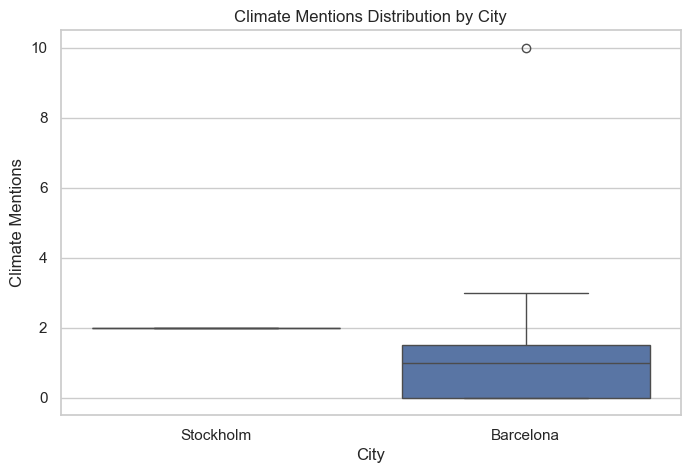

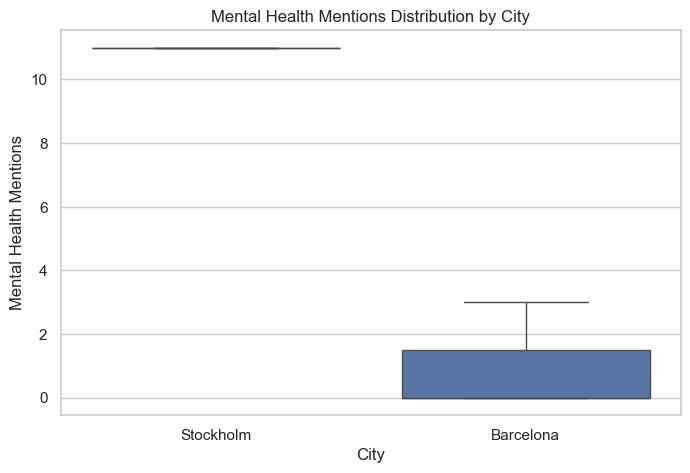

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for climate mentions by city
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x='cities', y='climate')
plt.title('Climate Mentions Distribution by City')
plt.ylabel('Climate Mentions')
plt.xlabel('City')
plt.show()

# Boxplot for mental_health mentions by city
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x='cities', y='mental_health')
plt.title('Mental Health Mentions Distribution by City')
plt.ylabel('Mental Health Mentions')
plt.xlabel('City')
plt.show()

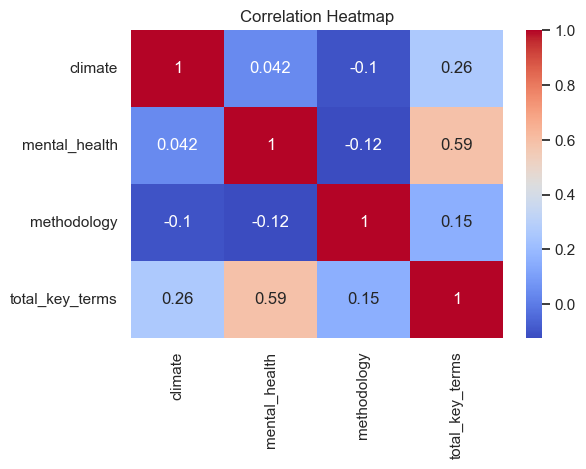

In [34]:
# Heatmap of correlations between key columns
plt.figure(figsize=(6,4))
corr = df_filtered[['climate', 'mental_health', 'methodology', 'total_key_terms']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()